In [32]:
#!/usr/bin/python
# encoding=utf8
import sys
reload(sys)
sys.setdefaultencoding('utf8')

import matplotlib.pyplot as plt
import numpy as np
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from astropy.stats import sigma_clip

### external codes
from redTools import *
from Kcorrect import *
  
########################################################### Begin

inFile  = 'ESN_HI_catal.csv'   # input catalog
table   = np.genfromtxt(inFile , delimiter=',', filling_values=-1, names=True, dtype=None)

table = extinctionCorrect(table)
table = Kcorrection(table)

## purifying input data
index, = np.where(table['Sba']>0.01)
table = trim(table, index)

index, = np.where(table['Wba']>0.01)
table = trim(table, index)

Sba = table['Sba']  # SDSS b/a
Wba = table['Wba']  # WISE b/a
Re_g = table['R50_g'] #half light radius for different bands
Re_r = table['R50_r']
Re_i = table['R50_i']
Re_z = table['R50_z']
Re_w1 = table['R50_w1']
Re_w2 = table['R50_w2']
Re_i_z = (1./2)*(Re_i + Re_z) #i+z half light radius

Text(0,0.5,'$R_e$ WISE w1-band [arcmin]')

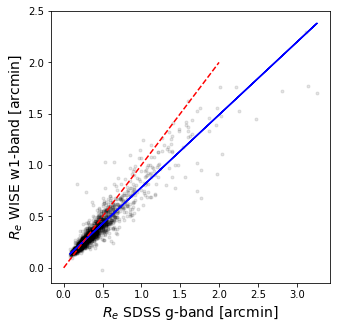

In [37]:
## defining the linear fit
def linfit(x, m, b):
    return m * x + b
fit_g, gfitcov = curve_fit(linfit, Re_g, Re_w1, p0=[1, 2])

#g vs w1
fig = plt.figure(figsize=(5, 5))
plt.scatter(Re_g, Re_w1, c='k', alpha=0.1, marker='.') # black points
plt.plot(Re_g, linfit(Re_g, fit_g[0], fit_g[1]), 'b') # blue linear fit
plt.plot([0,2],[0,2], 'r--')    # equality red line

plt.xlabel('$R_e$'+' SDSS g-band [arcmin]', size=14)
plt.ylabel('$R_e$'+' WISE w1-band [arcmin]', size=14)

Text(0,0.5,'$R_e$ WISE w1-band [arcmin]')

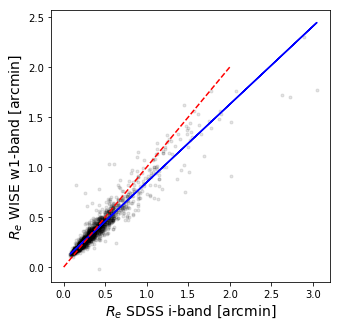

In [26]:
fit_i, gfitcov = curve_fit(linfit, Re_i, Re_w1, p0=[1, 2])

#i vs w1
fig = plt.figure(figsize=(5, 5))
plt.scatter(Re_i, Re_w1, c='k', alpha=0.1, marker='.') # black points
plt.plot(Re_i, linfit(Re_i, fit_i[0], fit_i[1]), 'b') # blue linear fit
plt.plot([0,2],[0,2], 'r--')    # equality red line

plt.xlabel('$R_e$'+' SDSS i-band [arcmin]', size=14)
plt.ylabel('$R_e$'+' WISE w1-band [arcmin]', size=14)

Text(0,0.5,'$R_e$ WISE w1-band [arcmin]')

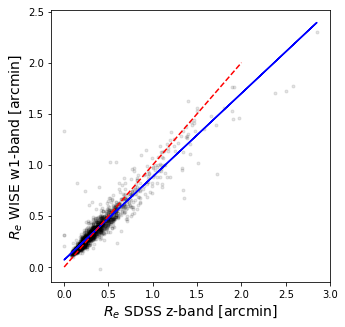

In [27]:
fit_z, gfitcov = curve_fit(linfit, Re_z, Re_w1, p0=[1, 2])

#z vs w1
fig = plt.figure(figsize=(5, 5))
plt.scatter(Re_z, Re_w1, c='k', alpha=0.1, marker='.') # black points
plt.plot(Re_z, linfit(Re_z, fit_z[0], fit_z[1]), 'b') # blue linear fit
plt.plot([0,2],[0,2], 'r--')    # equality red line

plt.xlabel('$R_e$'+' SDSS z-band [arcmin]', size=14)
plt.ylabel('$R_e$'+' WISE w1-band [arcmin]', size=14)

Text(0,0.5,'$R_e$ WISE w1-band [arcmin]')

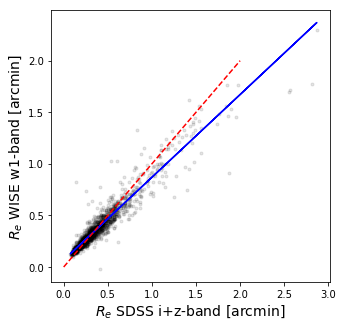

In [33]:
fit_i_z, gfitcov = curve_fit(linfit, Re_i_z, Re_w1, p0=[1, 2])

#i+z vs w1
fig = plt.figure(figsize=(5, 5))
plt.scatter(Re_i_z, Re_w1, c='k', alpha=0.1, marker='.') # black points
plt.plot(Re_i_z, linfit(Re_i_z, fit_i_z[0], fit_i_z[1]), 'b') # blue linear fit
plt.plot([0,2],[0,2], 'r--')    # equality red line

plt.xlabel('$R_e$'+' SDSS i+z-band [arcmin]', size=14)
plt.ylabel('$R_e$'+' WISE w1-band [arcmin]', size=14)